# Data Loading

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [75]:
train_dataset = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
test_dataset = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

train_dataset.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [76]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

# Data Visualization

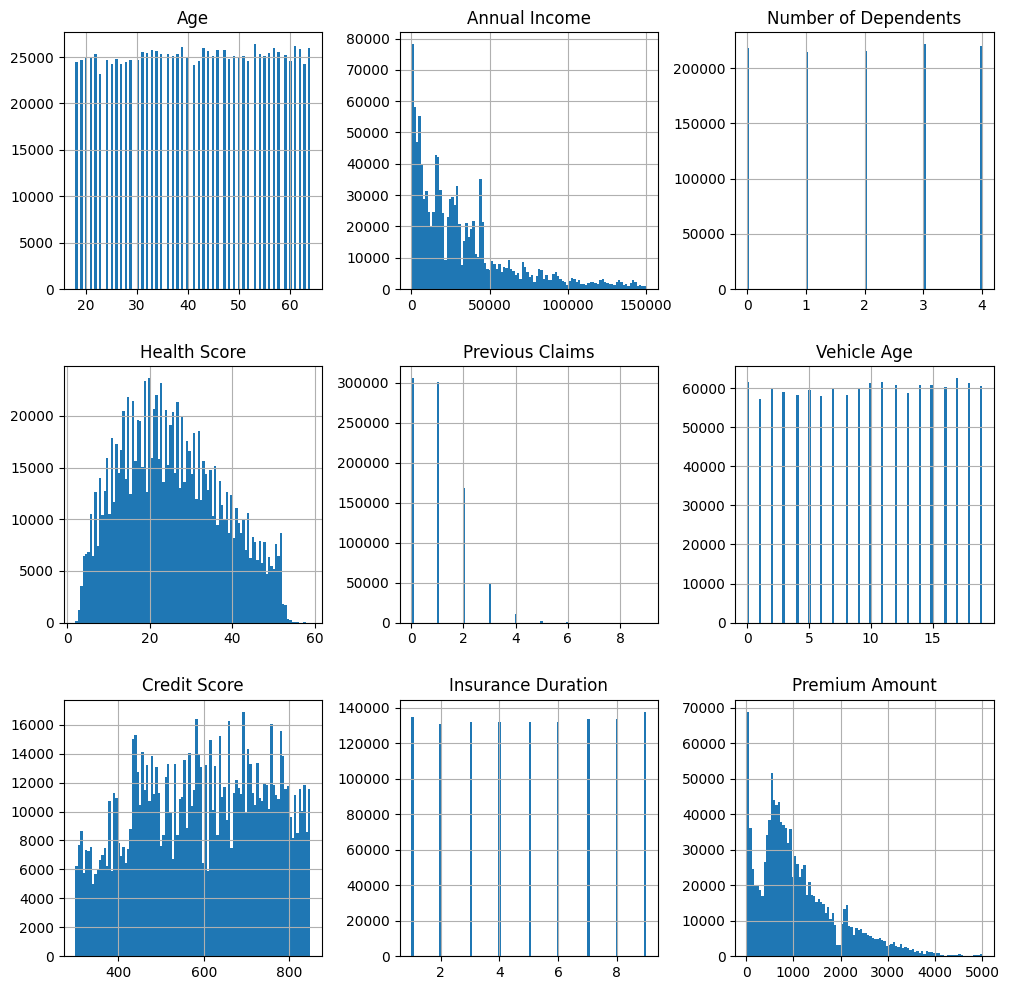

In [77]:
data_to_visualize = train_dataset.drop("id", axis=1)

data_to_visualize.hist(bins=100, figsize=(12,12))

plt.show()

![](https://web.fibion.com/wp-content/uploads/2024/01/25-Innovative-ESM-Data-Analysis-Identifying-Missing-Elements-in-Research-1.jpg)
## As we can see and as the info method show us before there are missing data in the dataset, instead other data is well distributed and we dosen't have the problem of having data of only some categories

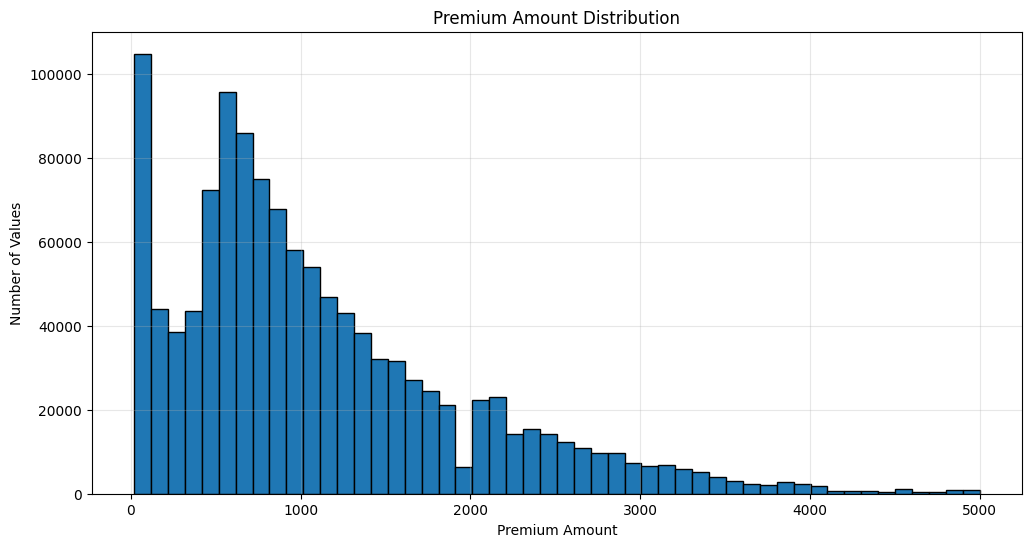

In [78]:
plt.figure(figsize=(12, 6))  # Dimensione del grafico

train_dataset["Premium Amount"].hist(bins=50, edgecolor='black')

plt.title('Premium Amount Distribution')
plt.xlabel('Premium Amount')
plt.ylabel('Number of Values')

plt.grid(True, alpha=0.3)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

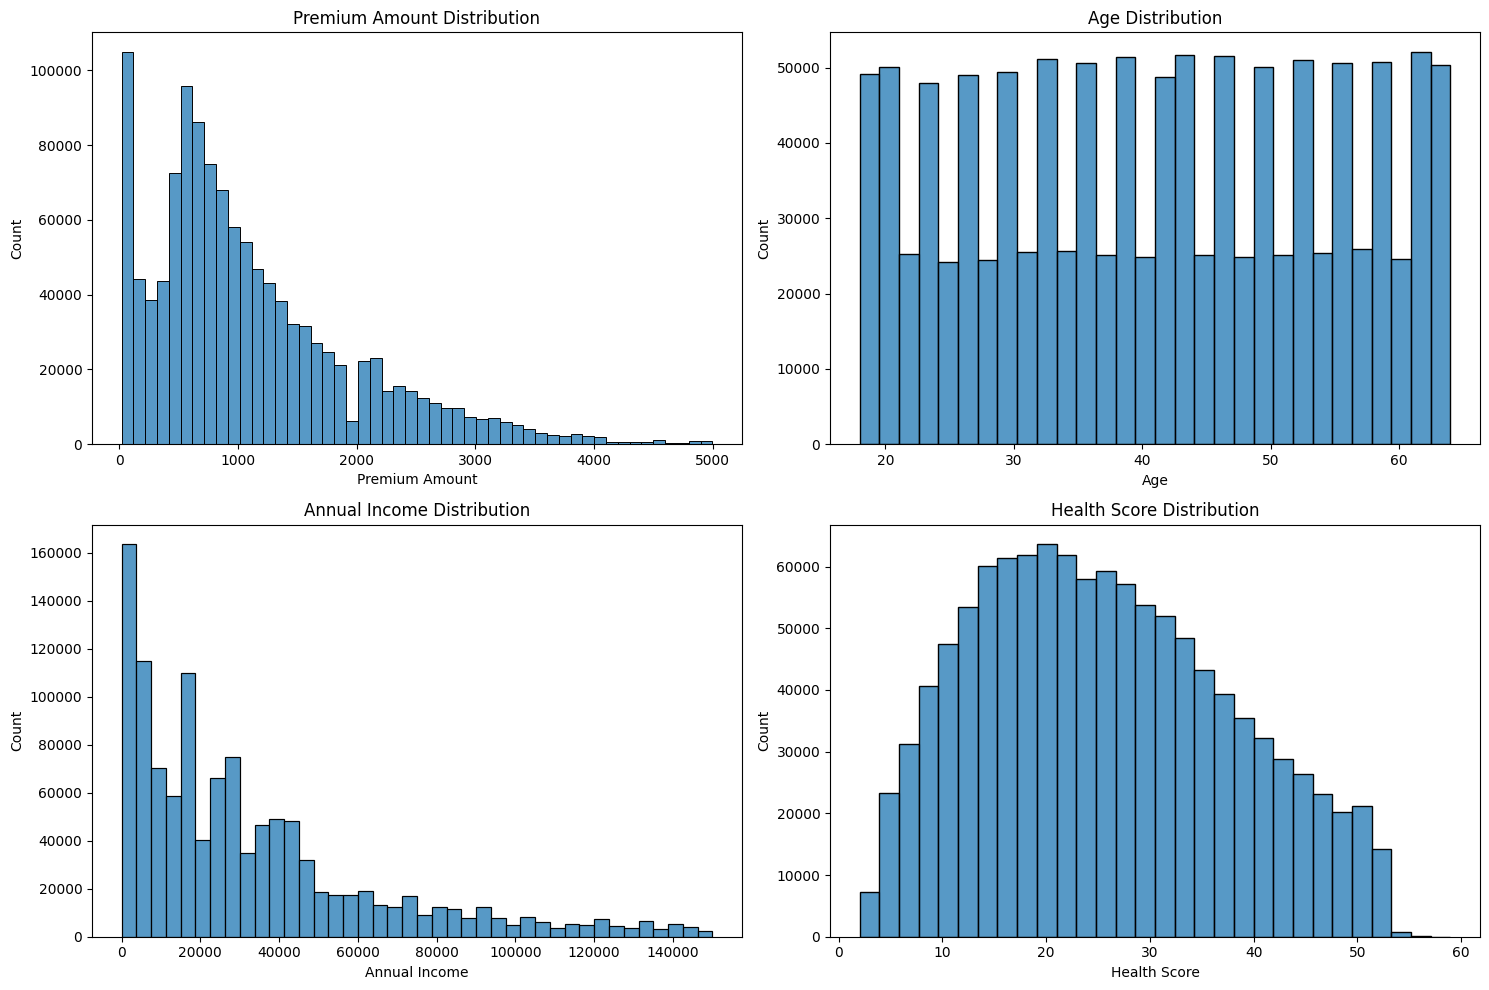

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Premium Amount
sns.histplot(data=train_dataset, x='Premium Amount', bins=50, ax=axes[0,0])
axes[0,0].set_title('Premium Amount Distribution')

# Age
sns.histplot(data=train_dataset, x='Age', bins=30, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')

# Annual Income
sns.histplot(data=train_dataset, x='Annual Income', bins=40, ax=axes[1,0])
axes[1,0].set_title('Annual Income Distribution')

# Health Score
sns.histplot(data=train_dataset, x='Health Score', bins=30, ax=axes[1,1])
axes[1,1].set_title('Health Score Distribution')

plt.tight_layout()
plt.show()

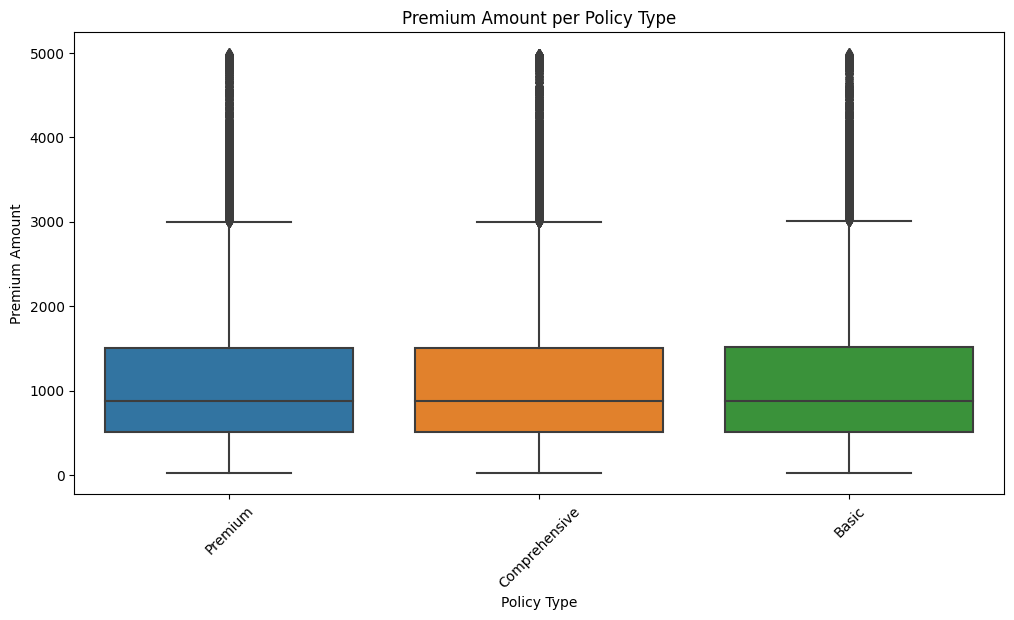

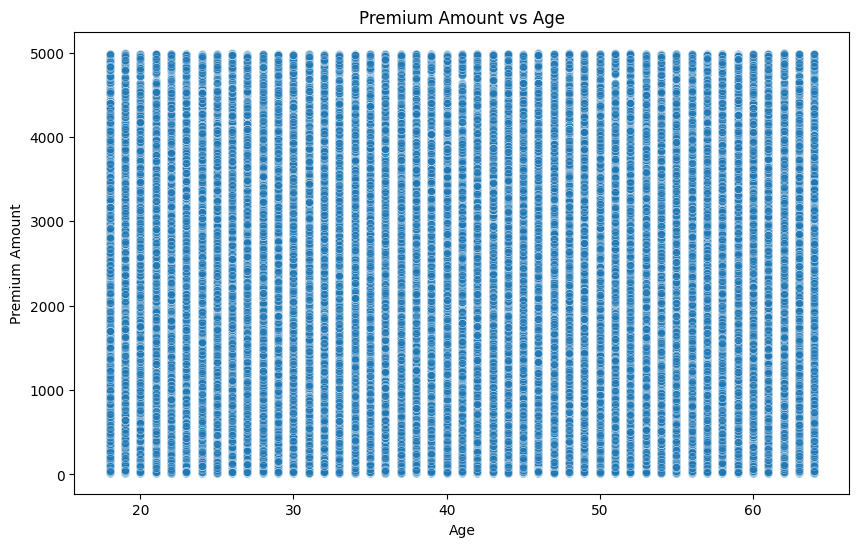

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_dataset, x='Policy Type', y='Premium Amount')
plt.xticks(rotation=45)
plt.title('Premium Amount per Policy Type')
plt.show()

# Scatter plot per vedere la relazione con variabili numeriche
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_dataset, x='Age', y='Premium Amount', alpha=0.5)
plt.title('Premium Amount vs Age')
plt.show()

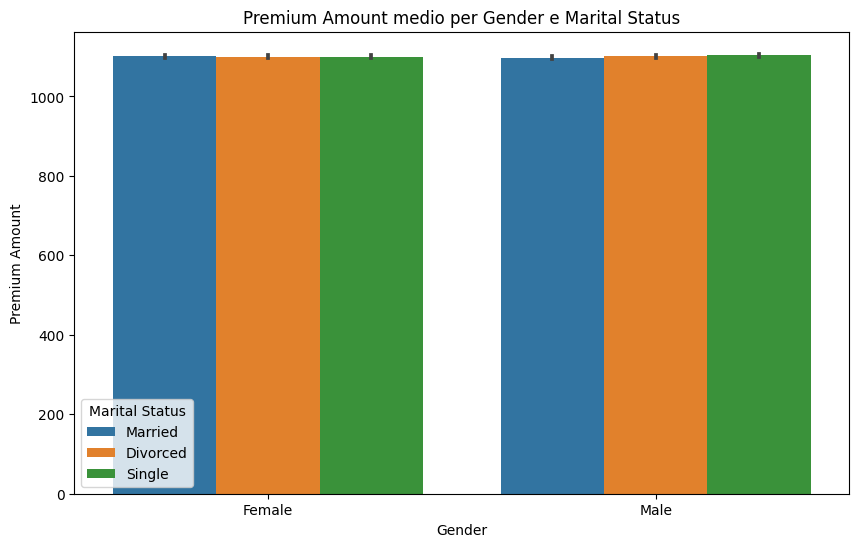

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_dataset, x='Gender', y='Premium Amount', hue='Marital Status')
plt.title('Premium Amount medio per Gender e Marital Status')
plt.show()

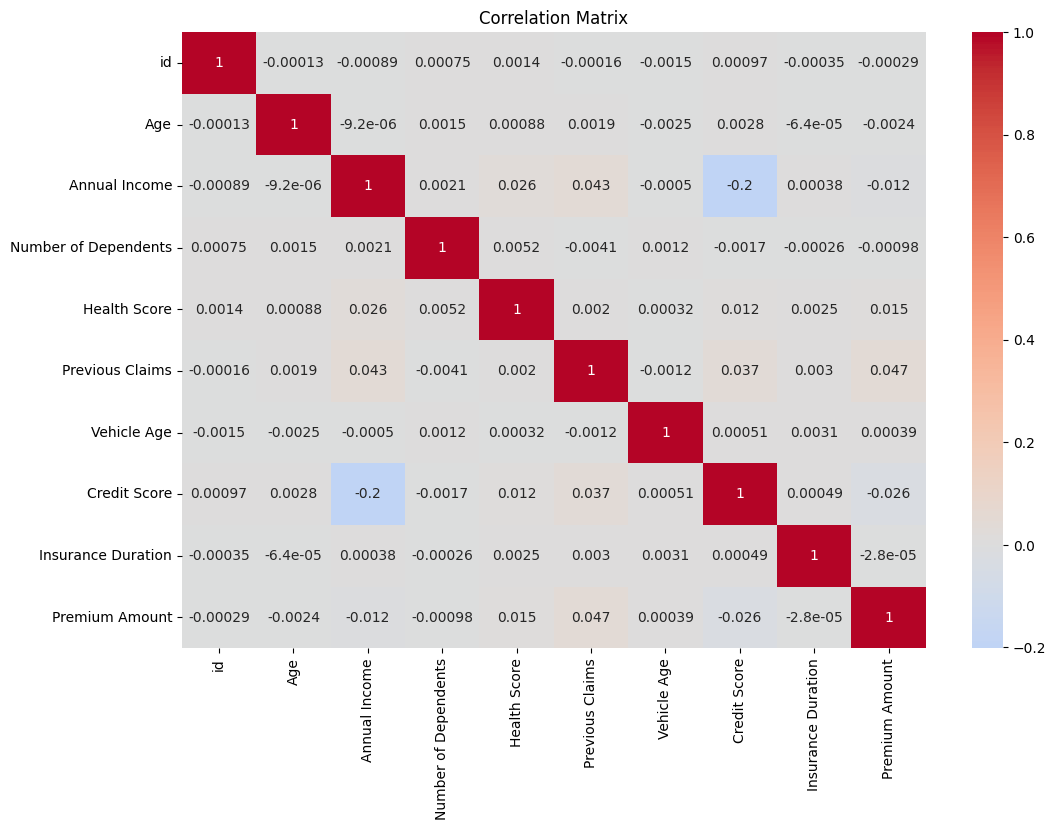

In [82]:
correlation_matrix = train_dataset.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [83]:
correlation_matrix["Premium Amount"].sort_values(ascending=False)

Premium Amount          1.000000
Previous Claims         0.046874
Health Score            0.014704
Vehicle Age             0.000391
Insurance Duration     -0.000028
id                     -0.000292
Number of Dependents   -0.000976
Age                    -0.002430
Annual Income          -0.012390
Credit Score           -0.026014
Name: Premium Amount, dtype: float64

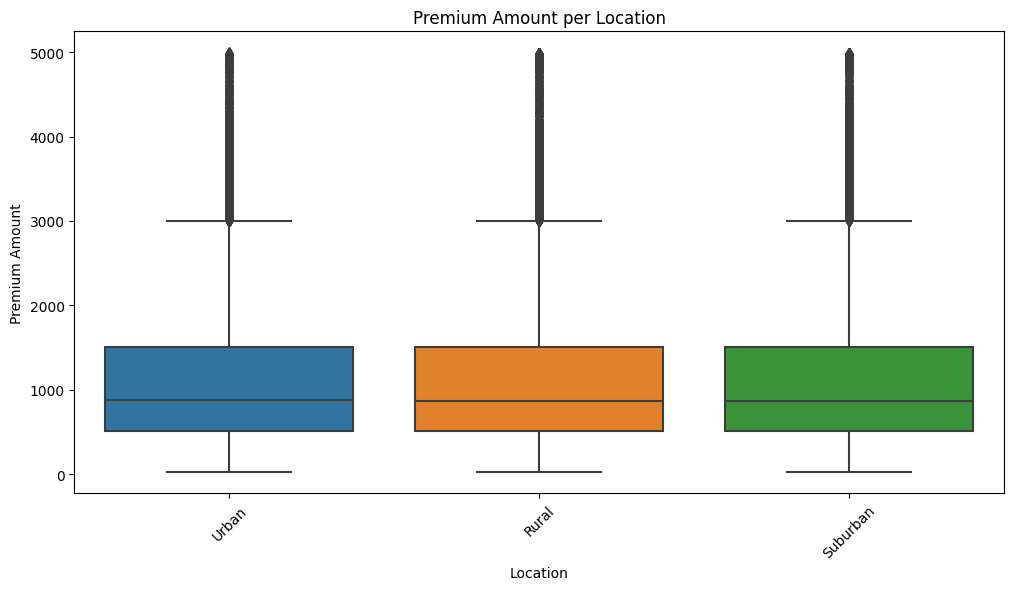

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_dataset, x='Location', y='Premium Amount')
plt.xticks(rotation=45)
plt.title('Premium Amount per Location')
plt.show()

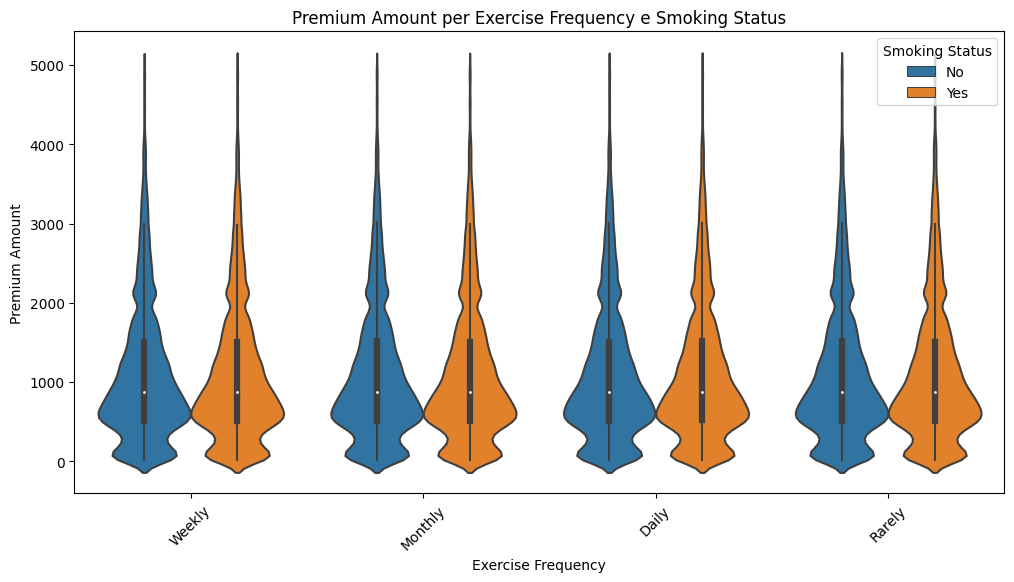

In [85]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_dataset, x='Exercise Frequency', y='Premium Amount', hue='Smoking Status')
plt.title('Premium Amount per Exercise Frequency e Smoking Status')
plt.xticks(rotation=45)
plt.show()

# Normalize and encode data, after that we will search if some new correlation of previous non numeric values will show to us

In [86]:
import sklearn

sklearn.__version__

'1.2.2'

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [88]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [89]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown="ignore", max_categories=10)
)

In [90]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include="object"))
)

parsed_train_data = train_dataset.drop(['id', 'Premium Amount'], axis=1)
train_labels = train_dataset["Premium Amount"]

parsed_train_data = preprocessing.fit_transform(parsed_train_data)

parsed_train_data_dataframe = pd.DataFrame(
    parsed_train_data,
    columns = preprocessing.get_feature_names_out(),
    index = train_dataset.index
)

parsed_train_data_dataframe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pipeline-1__Age,pipeline-1__Annual Income,pipeline-1__Number of Dependents,pipeline-1__Health Score,pipeline-1__Previous Claims,pipeline-1__Vehicle Age,pipeline-1__Credit Score,pipeline-1__Insurance Duration,pipeline-2__Gender_Female,pipeline-2__Gender_Male,...,pipeline-2__Customer Feedback_Poor,pipeline-2__Smoking Status_No,pipeline-2__Smoking Status_Yes,pipeline-2__Exercise Frequency_Daily,pipeline-2__Exercise Frequency_Monthly,pipeline-2__Exercise Frequency_Rarely,pipeline-2__Exercise Frequency_Weekly,pipeline-2__Property Type_Apartment,pipeline-2__Property Type_Condo,pipeline-2__Property Type_House
0,-1.648301,-0.707414,-0.746862,-0.249610,1.216739,1.286338,-1.567375,-0.007023,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.159542,-0.023289,0.733500,-0.844110,-0.002284,0.420713,0.714630,-1.163391,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.350549,-0.215473,0.733500,1.829212,-0.002284,0.766963,0.013020,-0.777935,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.499425,3.461605,-0.006681,-1.235840,-0.002284,-1.656788,-1.602810,-1.548847,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.499425,0.228896,-0.746862,-0.437598,-1.221307,-0.271787,0.034281,-0.392479,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [91]:
train_labels.head()

0    2869.0
1    1483.0
2     567.0
3     765.0
4    2022.0
Name: Premium Amount, dtype: float64

In [92]:
parsed_train_data_dataframe["Premium Amount"] = train_labels
correlation_matrix = parsed_train_data_dataframe.corr(numeric_only=True)

correlation_matrix["Premium Amount"].sort_values(ascending=False)

Premium Amount                                              1.000000
pipeline-1__Previous Claims                                 0.039394
pipeline-1__Health Score                                    0.013976
pipeline-2__Customer Feedback_Average                       0.007305
pipeline-2__Policy Start Date_infrequent_sklearn            0.003721
pipeline-2__Marital Status_Single                           0.003682
pipeline-2__Occupation_Self-Employed                        0.002608
pipeline-2__Occupation_Unemployed                           0.001787
pipeline-2__Education Level_High School                     0.001462
pipeline-2__Property Type_Apartment                         0.001313
pipeline-2__Location_Urban                                  0.000952
pipeline-2__Exercise Frequency_Daily                        0.000820
pipeline-2__Policy Type_Basic                               0.000740
pipeline-2__Policy Start Date_2023-11-02 15:21:39.134960    0.000690
pipeline-1__Vehicle Age           

# Feature Engenieering and additional parsing removing outliers

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def add_engineered_features(df):
    """
    Aggiunge feature engineered al dataframe originale
    """

    df = df.copy()
    
    df['health_risk'] = df['Health Score'] * df['Smoking Status'].map({'Yes': 1.5, 'No': 1.0})
    df['lifestyle_score'] = (df['Exercise Frequency']
                           .map({'Daily': 1.0, 'Weekly': 0.8, 'Monthly': 0.6, 'Rarely': 0.4}) 
                           * df['Health Score'])
    
    df['credit_income_ratio'] = df['Credit Score'] / df['Annual Income']
    
    df['claims_per_year'] = df['Previous Claims'] / df['Insurance Duration']
    df['age_health_factor'] = df['Age'] * (df['Health Score'] / 100)

    df['financial_risk_score'] = (df['credit_income_ratio'] * df['claims_per_year'])

    # Score che combina età e claims
    df['age_claims_interaction'] = df['Age'] * df['Previous Claims']
    
    # Ratio tra health_risk e credit_score
    df['health_credit_ratio'] = df['health_risk'] / df['Credit Score']

    df['weighted_risk_score'] = (
        df['Previous Claims'] * 0.4 +
        (100 - df['Health Score']) * 0.3 +
        df['claims_per_year'] * 0.3
    )
    
    # Bucketing di alcune variabili numeriche
    df['age_group'] = pd.qcut(df['Age'], q=5, labels=['very_young', 'young', 'middle', 'senior', 'elderly'])
    df['income_group'] = pd.qcut(df['Annual Income'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])

    df['premium_risk_score'] = (df['Previous Claims'] * df['Credit Score']) / df['Annual Income']
    df['wealth_indicator'] = df['Annual Income'] * (df['Credit Score'] / 100)

    return df

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds = None
        self.upper_bounds = None
        
    def fit(self, X, y=None):
        # Converte in array numpy se non lo è già
        X_array = np.asarray(X)
        
        # Calcola i bounds per ogni colonna
        q1 = np.quantile(X_array, 0.25, axis=0)
        q3 = np.quantile(X_array, 0.75, axis=0)
        iqr = q3 - q1
        
        self.lower_bounds = q1 - (self.factor * iqr)
        self.upper_bounds = q3 + (self.factor * iqr)
        
        return self
    
    def transform(self, X):
        # Converte in array numpy se non lo è già
        X_array = np.asarray(X)
        
        # Applica i bounds
        X_transformed = np.minimum(np.maximum(X_array, self.lower_bounds), self.upper_bounds)
        
        return X_transformed

    def get_feature_names_out(self, feature_names=None):
        """Restituisce i nomi delle feature dopo la trasformazione"""
        return feature_names if feature_names is not None else np.array([f"feature{i}" for i in range(self.n_features_in_)])

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [94]:
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include="object")),
    remainder='drop'
)

parsed_train_data = train_dataset.drop(['id', 'Premium Amount'], axis=1)
train_labels = train_dataset["Premium Amount"]

parsed_train_data = add_engineered_features(parsed_train_data)

parsed_train_data = preprocessing.fit_transform(parsed_train_data)

parsed_train_data_dataframe = pd.DataFrame(
    parsed_train_data,
    columns = preprocessing.get_feature_names_out(),
    index = train_dataset.index
)

parsed_train_data_dataframe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pipeline-1__Age,pipeline-1__Annual Income,pipeline-1__Number of Dependents,pipeline-1__Health Score,pipeline-1__Previous Claims,pipeline-1__Vehicle Age,pipeline-1__Credit Score,pipeline-1__Insurance Duration,pipeline-1__health_risk,pipeline-1__lifestyle_score,...,pipeline-2__Customer Feedback_Poor,pipeline-2__Smoking Status_No,pipeline-2__Smoking Status_Yes,pipeline-2__Exercise Frequency_Daily,pipeline-2__Exercise Frequency_Monthly,pipeline-2__Exercise Frequency_Rarely,pipeline-2__Exercise Frequency_Weekly,pipeline-2__Property Type_Apartment,pipeline-2__Property Type_Condo,pipeline-2__Property Type_House
0,-1.648301,-0.756646,-0.746862,-0.249610,1.453503,1.286338,-1.567375,-0.007023,-0.571076,0.040127,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.159542,0.025028,0.733500,-0.844110,0.052168,0.420713,0.714630,-1.163391,-0.524454,-0.832750,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.350549,-0.194559,0.733500,1.829212,0.052168,0.766963,0.013020,-0.777935,2.400075,2.004539,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.499425,2.381109,-0.006681,-1.235840,0.052168,-1.656788,-1.602810,-1.548847,-0.952993,-0.673273,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.499425,0.313173,-0.746862,-0.437598,-1.349166,-0.271787,0.034281,-0.392479,-0.079743,-0.137515,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [95]:
parsed_train_data_dataframe["Premium Amount"] = train_labels
correlation_matrix = parsed_train_data_dataframe.corr(numeric_only=True)

correlation_matrix["Premium Amount"].sort_values(ascending=False)

Premium Amount                                              1.000000
pipeline-1__Previous Claims                                 0.037538
pipeline-1__age_claims_interaction                          0.035111
pipeline-1__claims_per_year                                 0.030923
pipeline-1__credit_income_ratio                             0.029099
pipeline-1__health_credit_ratio                             0.022326
pipeline-1__financial_risk_score                            0.018821
pipeline-1__Health Score                                    0.013976
pipeline-1__health_risk                                     0.012437
pipeline-1__lifestyle_score                                 0.010937
pipeline-1__age_health_factor                               0.008835
pipeline-2__Customer Feedback_Average                       0.007305
pipeline-2__Policy Start Date_infrequent_sklearn            0.003721
pipeline-2__Marital Status_Single                           0.003682
pipeline-2__Occupation_Self-Employ

# Test Different Models

In [152]:
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("standardize", RobustScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown="ignore", max_categories=10)
)

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include="object")),
    remainder='drop'
)

In [158]:
train_dataset = add_engineered_features(train_dataset)

CORRELATION_THRESHOLD = 0.01

columns_to_keep = [
    'Previous Claims',
    'age_claims_interaction',
    'claims_per_year',
    'credit_income_ratio',
    'health_credit_ratio',
    'financial_risk_score',
    'Health Score',
    'health_risk',
    'lifestyle_score',
    'age_health_factor',
    'Credit Score',
    'Annual Income',
    'weighted_risk_score',
    'age_group',
    'income_group',
    'premium_risk_score',
    'wealth_indicator',
]

train_data = train_dataset[columns_to_keep]
train_labels = train_dataset["Premium Amount"]

test_data = test_dataset.drop(['id'], axis=1)

train_data.head()

,Previous Claims,age_claims_interaction,claims_per_year,credit_income_ratio,health_credit_ratio,financial_risk_score,Health Score,health_risk,lifestyle_score,age_health_factor,Credit Score,Annual Income,weighted_risk_score,age_group,income_group,premium_risk_score,wealth_indicator
0,2.0,38.0,0.400000,0.037019,0.060749,0.014807,22.598761,22.598761,18.079009,4.293765,372.0,10049.0,24.140372,very_young,low,0.074037,37382.28
1,1.0,39.0,0.500000,0.021908,0.033652,0.010954,15.569731,23.354596,9.341839,6.072195,694.0,31678.0,25.879081,middle,high,0.021908,219845.32
2,1.0,23.0,0.333333,NaN,NaN,NaN,47.177549,70.766324,37.742039,10.850836,NaN,25602.0,16.346735,very_young,medium,NaN,NaN
3,1.0,21.0,1.000000,0.002587,0.044706,0.002587,10.938144,16.407216,10.938144,2.297010,367.0,141855.0,27.418557,very_young,very_high,0.002587,520607.85
4,0.0,0.0,0.000000,0.015082,0.051111,0.000000,20.376094,30.564140,16.300875,4.278980,598.0,39651.0,23.887172,very_young,high,0.000000,237112.98


In [111]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train_data, train_labels)

predictions = lin_reg.predict(train_data)

In [113]:
from sklearn.metrics import mean_squared_log_error

def calculate_mean_squared_log_error(labels, predictions):
    return np.sqrt(mean_squared_log_error(labels, predictions))

calculate_mean_squared_log_error(train_labels, predictions)

1.1685701841361709

In [153]:
from xgboost import XGBRegressor

# Creazione del modello XGBoost con alcuni iperparametri di base
xgb_reg = make_pipeline(preprocessing,
                       XGBRegressor(
                           n_estimators=100,
                           learning_rate=0.1,
                           max_depth=5,
                           random_state=42
                       ))
train_labels_log = np.log1p(train_labels)

xgb_reg.fit(train_data, train_labels_log)

xgb_predictions = np.expm1(xgb_reg.predict(train_data))

calculate_mean_squared_log_error(train_labels, xgb_predictions)

1.0548907313959404

In [164]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Creazione del modello LightGBM con iperparametri simili a XGBoost
lgbm_reg = make_pipeline(preprocessing,
                        LGBMRegressor(
                            n_estimators=100,
                            learning_rate=0.1,
                            max_depth=5,
                            random_state=42
                        ))

train_labels_log = np.log1p(train_labels)

lgbm_reg.fit(train_data, train_labels_log)

lgbm_predictions = np.expm1(lgbm_reg.predict(train_data))

calculate_mean_squared_log_error(train_labels, lgbm_predictions)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3285
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 15
[LightGBM] [Info] Start training from score 6.593889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

1.054881603160582

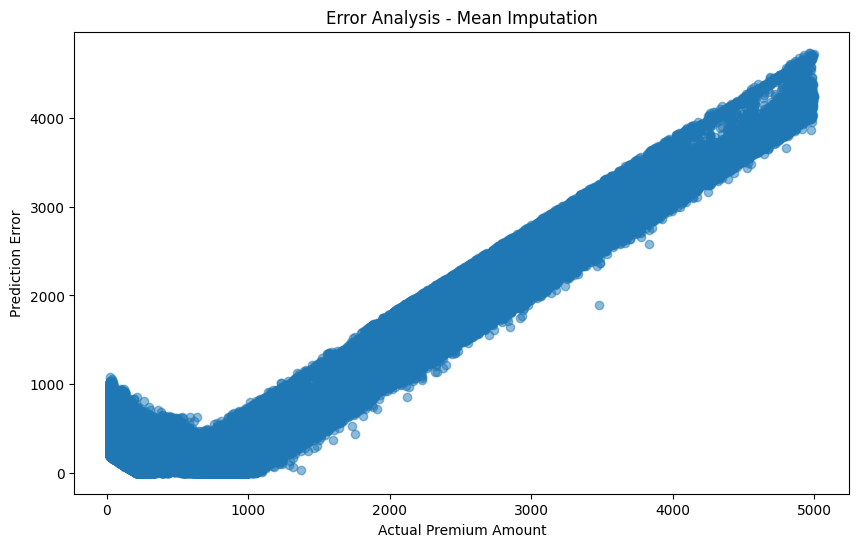

In [162]:
# Plot degli errori
errors = abs(lgbm_predictions - train_labels)
plt.figure(figsize=(10,6))
plt.scatter(train_labels, errors, alpha=0.5)
plt.xlabel('Actual Premium Amount')
plt.ylabel('Prediction Error')
plt.title('Error Analysis - Mean Imputation')
plt.show()

# As We Know before the dataset is unbalanced in the higher and loer price range so that error distribution for no is normal


In [166]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'lgbmregressor__n_estimators': randint(50, 200),
    'lgbmregressor__learning_rate': uniform(0.05, 0.2),
    'lgbmregressor__max_depth': randint(3, 8),
    'lgbmregressor__num_leaves': randint(20, 50),
    'lgbmregressor__min_child_samples': randint(1, 10),
    'lgbmregressor__subsample': uniform(0.6, 0.4),
    'lgbmregressor__colsample_bytree': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(
    estimator=lgbm_reg,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_log_error',
    random_state=42,
    verbose=2,
)

random_search.fit(train_data, train_labels_log)

print("Migliori parametri:", random_search.best_params_)
print("Miglior punteggio:", -random_search.best_score_)

best_lgbm_model = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3280
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 15
[LightGBM] [Info] Start training from score 6.594054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [169]:
lgbm_predictions = np.expm1(best_lgbm_model.predict(train_data))

calculate_mean_squared_log_error(train_labels, lgbm_predictions)

1.0494207361950072

## awesome we reduce the error with automatic hyperparameters searching!

# Final Submission
we now know what model to use (lightGBM) and know best hyperparameters
so it's time to have our final model and get the final results for the submission

In [170]:
test_dataset = add_engineered_features(test_dataset)

test_dataset_cleaned = test_dataset[columns_to_keep]

test_predictions = np.expm1(best_lgbm_model.predict(test_dataset_cleaned))

In [171]:
submission = pd.DataFrame({'id': test_dataset['id'],'Premium Amount': test_predictions})
submission

,id,Premium Amount
0,1200000,706.167303
1,1200001,821.251531
2,1200002,812.113276
3,1200003,816.145761
4,1200004,758.736323
...,...,...
799995,1999995,957.565397
799996,1999996,675.987245
799997,1999997,818.624446
799998,1999998,797.448463


In [172]:
submission.to_csv('submission.csv',index = False)